### Image Augmentation
[Image Augmentation](https://medium.com/nanonets/how-to-use-deep-learning-when-you-have-limited-data-part-2-data-augmentation-c26971dc8ced) 

Image Augmentation is the common used technique to improve the performance of computer vision system. Refer to the W2 of Convolutional Neutral Network Course on Cousera. Especially in the WIDS dataset, which is an unbalanced dataset. Upsampling the images with oil-palm is the way to handle the unbalanced problem.
Image augmentation artificially creates training images through different ways of processing or combination of multiple processing, such as mirroring, random rotation, shifts, shear and flips, etc. Keras has keras.preprocessing.image.ImageDataGenerator function to do image augmentation. Here showed how to use OpenCV to rotate, flip, and add Gaussian noise to original images.

In [3]:
## Imgae augmentation of label 1 class images 
import cv2
import numpy as np
import os
import random
class Data_augmentation:
    '''
    Image class to help do data augmentation for jpg file using cv2 package
    '''
    def __init__(self, path, image_name):
        '''
        Import image
        :param path: Path to the image
        :param image_name: image name
        '''
        self.path = path
        self.name = image_name
        print(path+image_name)
        self.image = cv2.imread(path+image_name)

    def rotate(self, image, angle=90, scale=1.0):
        '''
        Rotate the image
        :param image: image to be processed
        :param angle: Rotation angle in degrees. Positive values mean counter-clockwise rotation (the coordinate origin is assumed to be the top-left corner).
        :param scale: Isotropic scale factor.
        '''
        w = image.shape[1]
        h = image.shape[0]
        #rotate matrix
        M = cv2.getRotationMatrix2D((w/2,h/2), angle, scale)
        #rotate
        image = cv2.warpAffine(image,M,(w,h))
        return image

    def flip(self, image, vflip=False, hflip=False):
        '''
        Flip the image
        :param image: image to be processed
        :param vflip: whether to flip the image vertically
        :param hflip: whether to flip the image horizontally
        '''
        if hflip or vflip:
            if hflip and vflip:
                c = -1
            else:
                c = 0 if vflip else 1
            image = cv2.flip(image, flipCode=c)
        return image 
    
    def add_GaussianNoise(self, image, mean=0, var=0.001): 
        ''' 
        Add Gaussian noise to image 
        :param image: image to be processed
        :param mean: mean of the Gaussian distribution
        :param var: variance of the Gaussian distribution
        ''' 
        w = image.shape[1]
        h = image.shape[0]
        image = np.array(image/255, dtype=float)
        noise = np.random.normal(mean, var ** 0.5, image.shape)
        out = image + noise
        if out.min() < 0:
            low_clip = -1.
        else:
            low_clip = 0.
        out = np.clip(out, low_clip, 1.0)
        out = np.uint8(out*255)
        return out
    
    def image_augment(self, save_path): 
        '''
        Create the new image with imge augmentation
        :param path: the path to store the new image
        ''' 
        img = self.image.copy()
        img_flip = self.flip(img, vflip=True, hflip=False)
        img_rot = self.rotate(img)
        img_gaussian = self.add_GaussianNoise(img)
        
        name_int = self.name[:len(self.name)-4]
        cv2.imwrite(save_path+'%s' %str(name_int)+'_vflip.jpg', img_flip)
        cv2.imwrite(save_path+'%s' %str(name_int)+'_rot.jpg', img_rot)
        cv2.imwrite(save_path+'%s' %str(name_int)+'_GaussianNoise.jpg', img_gaussian)

In [9]:
def main(file_dir,output_path):
    for root, _, files in os.walk(file_dir):
        print(root)
    for file in files:
        raw_image = Data_augmentation(root,file)
        raw_image.image_augment(output_path)

In [11]:
main('/home/hanzhang/HZ_project/keras_train/class1/', '/home/hanzhang/HZ_project/label1/')

### Now Let's look at the results 

In [1]:
f_name = ['img_072492018.jpg','img_072492018_rot.jpg','img_072492018_GaussianNoise.jpg',
          'img_072492018_flip.jpg']

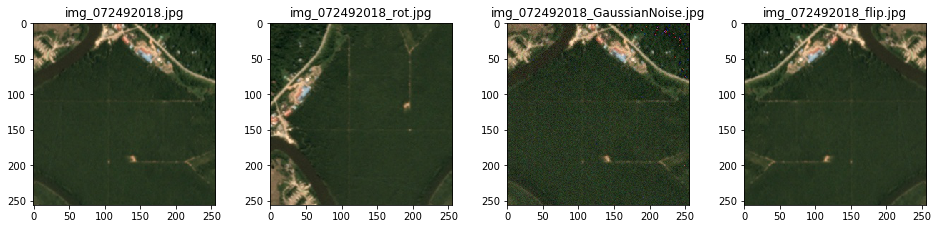

In [7]:
import matplotlib.pyplot as plt
from PIL import Image

fig=plt.figure(figsize=(16, 9))
count = 0
for i in f_name:
    im = Image.open('/home/hanzhang/HZ_project/keras_train/class1/'+i)
    count = count+1
    fig.add_subplot(1, 4, count)
    fig.subplots_adjust(hspace=0.3,wspace=0.3)
    plt.imshow(im)
    plt.title(i)